In [4]:
import sys
!conda install --yes --prefix={sys.prefix} seaborn
!{sys.executable} -m pip install folium branca iPywidgets

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\highg\source\price_prediction\env

  added / updated specs:
    - seaborn


The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/noarch::seaborn-0.11.1-pyhd3eb1b0_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
  Using cached folium-0.12.1-py2.py3-none-any.whl (94 kB)
  Using cached branca-0.4.2-py3-none-any.whl (24 kB)
  Using cached requests-2.25.1-py2.py3-none-any.whl (61 kB)
  Using cached urllib3-1.26.3-py2.py3-none-any.whl (137 kB)
  Using cached chardet-4.0.0-py2.py3-none-any.whl (178 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)


In [5]:
# initial imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
# import king county house sales dataset
kcdata = pd.read_csv('kc_house_data.csv')
kcdata.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
kcdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
kcdata['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [9]:
# Reduce the dataset to the three zip codes we're interested in
# north seattle, maple valley, and redmond washington
zips = [98103, 98038, 98052]
kcdata = kcdata[kcdata['zipcode'].isin(zips)]

In [10]:
kcdata['zipcode'].value_counts()

98103    602
98038    590
98052    574
Name: zipcode, dtype: int64

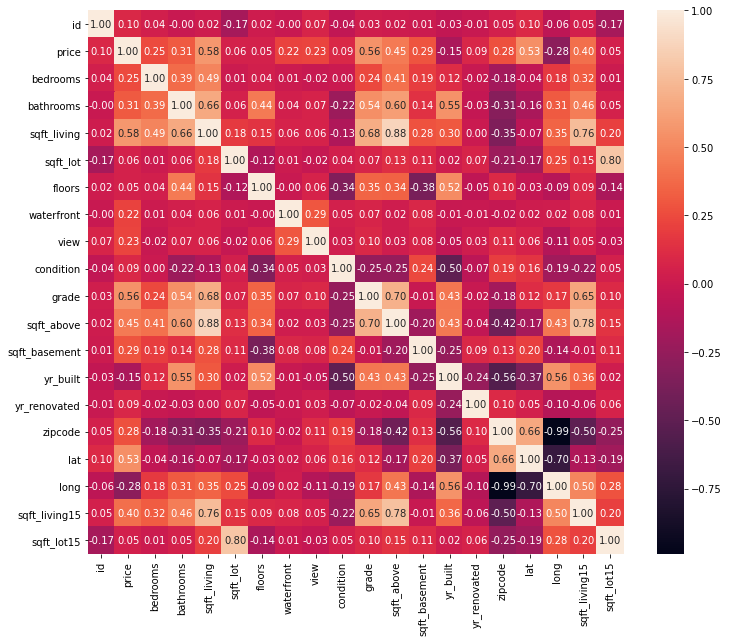

In [11]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(kcdata.corr(), annot=True, fmt='.2f', ax=ax)
plt.show()

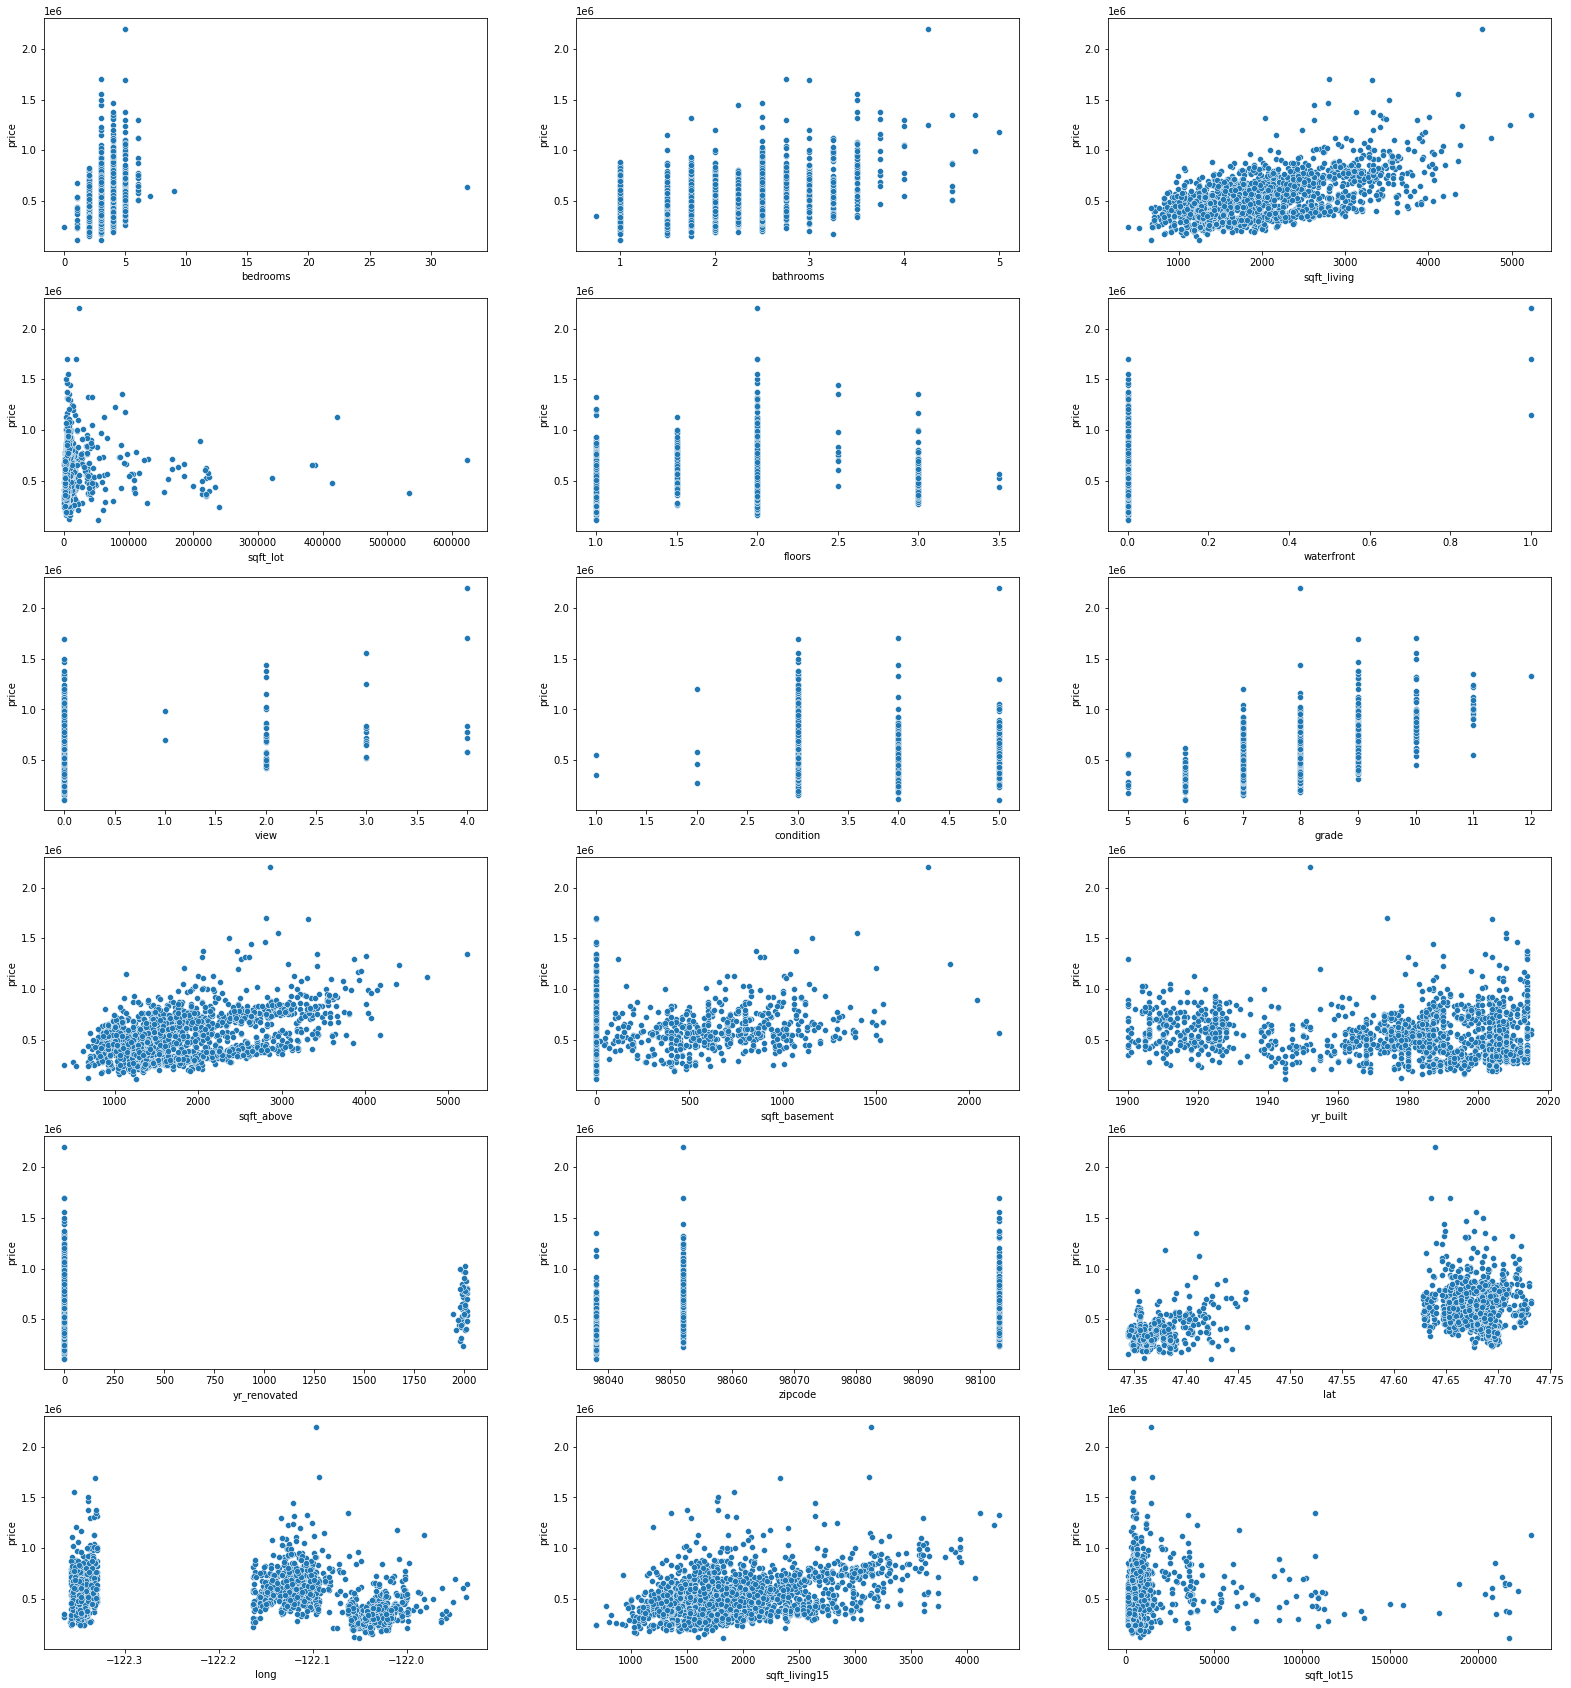

In [12]:
fig, ax= plt.subplots(figsize=(27,30), ncols=3, nrows=6)
sns.scatterplot(x="bedrooms", y="price",data=kcdata, ax=ax[0][0])
sns.scatterplot(x="bathrooms", y="price",data=kcdata, ax=ax[0][1])
sns.scatterplot(x="sqft_living", y="price",data=kcdata, ax=ax[0][2])
sns.scatterplot(x="sqft_lot", y="price",data=kcdata, ax=ax[1][0])
sns.scatterplot(x="floors", y="price",data=kcdata, ax=ax[1][1])
sns.scatterplot(x="waterfront", y="price",data=kcdata, ax=ax[1][2])
sns.scatterplot(x="view", y="price",data=kcdata, ax=ax[2][0])
sns.scatterplot(x="condition", y="price",data=kcdata, ax=ax[2][1])
sns.scatterplot(x="grade", y="price",data=kcdata, ax=ax[2][2])
sns.scatterplot(x="sqft_above", y="price",data=kcdata, ax=ax[3][0])
sns.scatterplot(x="sqft_basement", y="price",data=kcdata, ax=ax[3][1])
sns.scatterplot(x="yr_built", y="price",data=kcdata, ax=ax[3][2])
sns.scatterplot(x="yr_renovated", y="price",data=kcdata, ax=ax[4][0])
sns.scatterplot(x="zipcode", y="price",data=kcdata, ax=ax[4][1])
sns.scatterplot(x="lat", y="price",data=kcdata, ax=ax[4][2])
sns.scatterplot(x="long", y="price",data=kcdata, ax=ax[5][0])
sns.scatterplot(x="sqft_living15", y="price",data=kcdata, ax=ax[5][1])
sns.scatterplot(x="sqft_lot15", y="price",data=kcdata, ax=ax[5][2])
plt.show();

In [13]:
# create location dataframe before we prune the original dataset
kc_locs = kcdata.filter(['zipcode','lat', 'long', 'price'])

In [14]:
# drop the features we aren't interested in
kcdata.drop(['id','date','condition','long', 'lat',
       'sqft_lot15','yr_built','view',
       'waterfront','yr_renovated', 'sqft_living15'],axis=1,inplace=True)

In [15]:
kcdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1766 entries, 9 to 21608
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1766 non-null   float64
 1   bedrooms       1766 non-null   int64  
 2   bathrooms      1766 non-null   float64
 3   sqft_living    1766 non-null   int64  
 4   sqft_lot       1766 non-null   int64  
 5   floors         1766 non-null   float64
 6   grade          1766 non-null   int64  
 7   sqft_above     1766 non-null   int64  
 8   sqft_basement  1766 non-null   int64  
 9   zipcode        1766 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 151.8 KB


<AxesSubplot:xlabel='sqft_basement'>

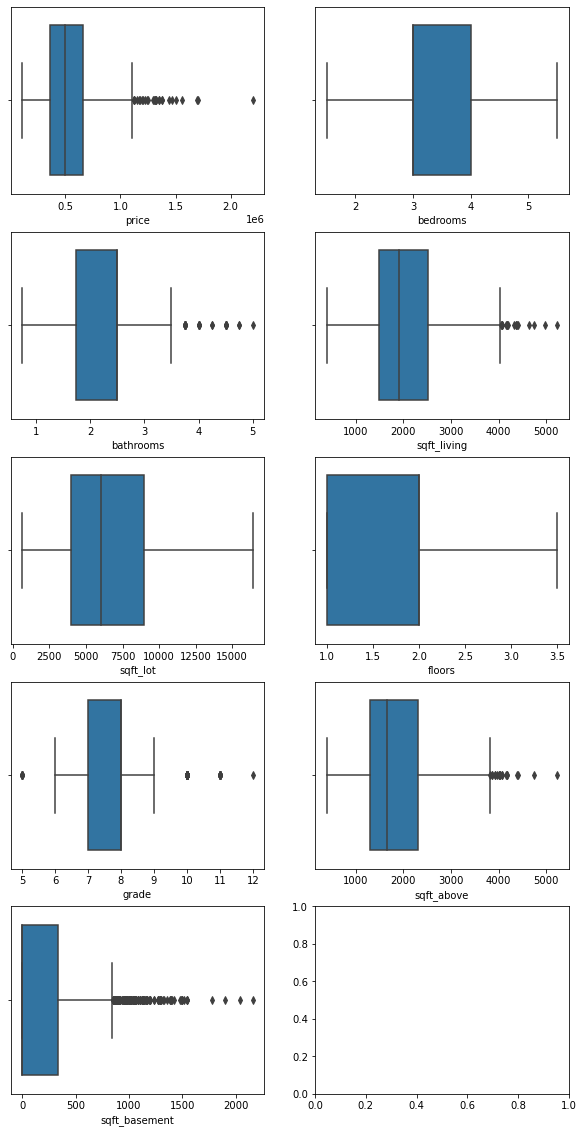

In [42]:
# look at outliers
fig, ax = plt.subplots(figsize=(10,20), nrows=5, ncols=2)
sns.boxplot(x=kcdata['price'],data=kcdata,ax=ax[0][0])
sns.boxplot(x=kcdata['bedrooms'],data=kcdata,ax=ax[0][1])
sns.boxplot(x=kcdata['bathrooms'],data=kcdata,ax=ax[1][0])
sns.boxplot(x=kcdata['sqft_living'],data=kcdata,ax=ax[1][1])
sns.boxplot(x=kcdata['sqft_lot'],data=kcdata,ax=ax[2][0])
sns.boxplot(x=kcdata['floors'],data=kcdata,ax=ax[2][1])
sns.boxplot(x=kcdata['grade'],data=kcdata,ax=ax[3][0])
sns.boxplot(x=kcdata['sqft_above'],data=kcdata,ax=ax[3][1])
sns.boxplot(x=kcdata['sqft_basement'],data=kcdata,ax=ax[4][0])

In [17]:
# handle outliers with IQR
def find_outliers(feat):
    Q1,Q3 = np.percentile(feat, [25,75])
    IQR = Q3 - Q1
    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)
    print(lower, upper)
    return lower, upper

def remove_outliers(df, feat):
    lower, upper = find_outliers(df[feat])
    df[feat] = np.where(df[feat]>upper, upper,df[feat])
    df[feat] = np.where(df[feat]<lower, lower,df[feat])


In [18]:
#for feat in kcdata.columns:
#    remove_outliers(kcdata, feat)
remove_outliers(kcdata, 'bedrooms')

1.5 5.5


In [41]:
remove_outliers(kcdata, 'sqft_lot')

-3440.0 16400.0


In [59]:
kcdata['price'].max()

2200000.0

In [20]:
import folium
import branca

In [54]:
from folium.plugins import HeatMap

# function in case I want to use more of these maps
def generateBaseMap(default_location=[47.5, -122.15], default_zoom_start=9.6):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

colormap = branca.colormap.LinearColormap(colors=['purple','blue','teal','cyan','lime'],
                             vmin=kc_locs['price'].min(), vmax=kc_locs['price'].max(),
                             caption='Sale Value ($)')

gradient_dict = {0.2: 'purple', 0.4:'blue', 0.65:'teal', 0.75:'cyan',0.95:'lime'}

heatmap = generateBaseMap()
colormap.add_to(heatmap)
# add heatmap
HeatMap(data=kc_locs[kc_locs['zipcode'] == 98103.0][['lat','long','price']].groupby(['lat','long']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='98103',gradient=gradient_dict,blur=12).add_to(heatmap)
HeatMap(data=kc_locs[kc_locs['zipcode'] == 98052.0][['lat','long','price']].groupby(['lat','long']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='98052',gradient=gradient_dict,blur=12).add_to(heatmap)
HeatMap(data=kc_locs[kc_locs['zipcode'] == 98038.0][['lat','long','price']].groupby(['lat','long']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='98038',gradient=gradient_dict,blur=12).add_to(heatmap)
folium.LayerControl(collapsed=False).add_to(heatmap)

In [99]:
from folium.plugins import MarkerCluster

clustermap = generateBaseMap()

marker_cluster = MarkerCluster().add_to(clustermap)

for ind, row in kc_locs.iterrows():
    folium.Marker(location=list((row[1],row[2])), popup=str(row[3])).add_to(marker_cluster)

#clustermap

In [100]:
from IPython.core.display import display, HTML

htmlmap = HTML('<iframe srcdoc="{}" style="float:left; width: {}px; height: {}px; display:inline-block; width: 50%; margin: 0 auto; border: 2px solid black"></iframe>'
           '<iframe srcdoc="{}" style="float:right; width: {}px; height: {}px; display:inline-block; width: 50%; margin: 0 auto; border: 2px solid black"></iframe>'
           .format(basemap.get_root().render().replace('"', '&quot;'),500,500,
                   clustermap.get_root().render().replace('"', '&quot;'),500,500))
display(htmlmap)

C:\Users\highg\source\price_prediction\env\lib\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [101]:
# start modeling the main dataset using a few different regressors
model = []
score = []

model_pred = []
score_pred = []

X=kcdata.drop(['price'],axis=1)
y=kcdata['price']

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(37)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

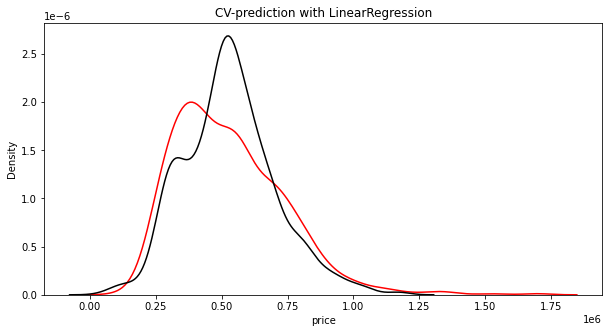

In [102]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# linear regression
LinReg=LinearRegression()
LinReg.fit(X_train,y_train)

from sklearn.model_selection import  cross_val_score,cross_val_predict
cv_LinReg=cross_val_score(LinReg,X_train,y_train,cv=10)
cv_LinReg_pred=cross_val_predict(LinReg,X_train,y_train,cv=10)

model.append("Linear Regression")
score.append(r2_score(y_train,cv_LinReg_pred))

#Visualisation
fig,ax=plt.subplots(figsize=(10, 5))
ax=sns.kdeplot(y_train,label='Y-Train',color='r', legend=True)
sns.kdeplot(cv_LinReg_pred,label='Pred-CV-Value',color='black',ax=ax, legend=True)
plt.title("CV-prediction with LinearRegression");

Text(0.5, 1.0, 'CV-prediction with DecisionTreeRegressor')

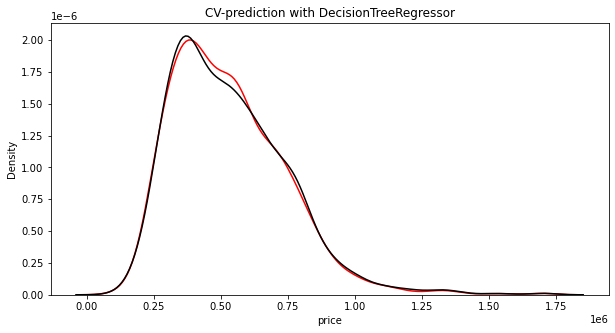

In [103]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)

from sklearn.model_selection import  cross_val_score,cross_val_predict
cv_DTR=cross_val_score(DTR,X_train,y_train,cv=10)
cv_DTR_pred=cross_val_predict(DTR,X_train,y_train,cv=10)

model.append("DecisionTreeRegressor")
score.append(r2_score(y_train,cv_DTR_pred)) 

#Visualisation
fig,ax=plt.subplots(figsize=(10, 5))
ax=sns.kdeplot(y_train,label='Y-Train',color='r')
sns.kdeplot(cv_DTR_pred,label='Pred-CV-Value',color='black',ax=ax)
plt.title("CV-prediction with DecisionTreeRegressor")

Text(0.5, 1.0, 'CV-prediction with RandomForestRegressor')

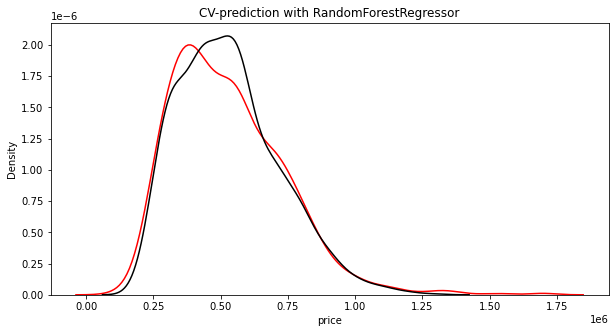

In [104]:
RFR=RandomForestRegressor(n_estimators=100, random_state = 42)
RFR.fit(X_train,y_train)

from sklearn.model_selection import  cross_val_score,cross_val_predict
cv_RFR=cross_val_score(RFR,X_train,y_train,cv=10)
cv_RFR_pred=cross_val_predict(RFR,X_train,y_train,cv=10)

model.append("RandomForestRegressor")
score.append(r2_score(y_train,cv_RFR_pred)) 

#Visualisation
fig,ax=plt.subplots(figsize=(10, 5))
ax=sns.kdeplot(y_train,label='Y-Train',color='r')
sns.kdeplot(cv_RFR_pred,label='Pred-CV-Value',color='black',ax=ax)
plt.title("CV-prediction with RandomForestRegressor")

Text(0.5, 1.0, 'Prediction with test features in LinearRegression')

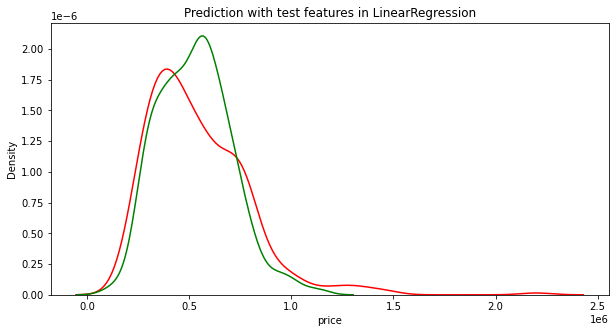

In [105]:
#LinearRegression
LinReg.fit(X_train,y_train)
LinReg_pred=LinReg.predict(X_test)

model_pred.append("Linear Regression")
score_pred.append(r2_score(y_test,LinReg_pred))

#Visualisation
f,ax=plt.subplots(figsize=(10, 5))
ax=sns.kdeplot(y_test,label='Test data',color='r')
sns.kdeplot(LinReg_pred,label='Pred-Value',color='g',ax=ax)
plt.title("Prediction with test features in LinearRegression") 

Text(0.5, 1.0, 'Prediction with test features via DecisionTreeRegressor')

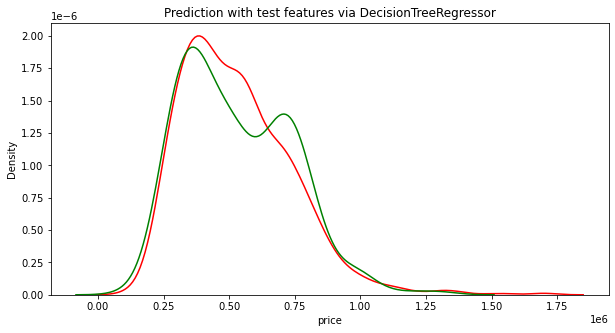

In [106]:
DTR.fit(X_train,y_train)
DTR_pred=DTR.predict(X_test)

model_pred.append("DecisionTreeRegressor")
score_pred.append(r2_score(y_test,DTR_pred))

#Visualisation
f,ax=plt.subplots(figsize=(10, 5))
ax=sns.kdeplot(y_train,label='Test data',color='r')
sns.kdeplot(DTR_pred,label='Predictions',color='g',ax=ax)
plt.title("Prediction with test features via DecisionTreeRegressor")

Text(0.5, 1.0, 'Prediction with test features via RandomForestRegressor')

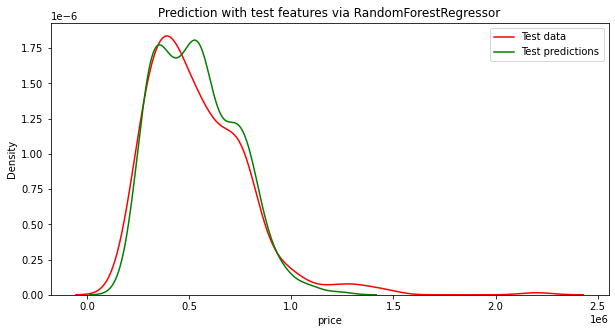

In [107]:
RFR.fit(X_train,y_train)
RFR_pred=RFR.predict(X_test)

model_pred.append("RandomForestRegressor")
score_pred.append(r2_score(y_test,RFR_pred))

#Visualisation
f,ax=plt.subplots(figsize=(10, 5))
ax=sns.kdeplot(y_test,label='Test data',color='r')
sns.kdeplot(RFR_pred,label='Test predictions',color='g',ax=ax)
#sns.kdeplot(cv_RFR_pred,label='Pred-CV-Value',color='black',ax=ax)
plt.legend()
plt.title("Prediction with test features via RandomForestRegressor")

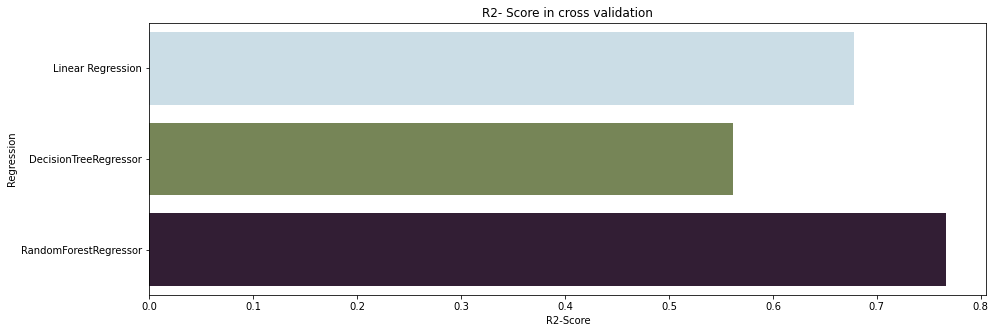

In [108]:
# Predictions of Cross Validation
plt.subplots(figsize=(15, 5)) 
sns.barplot(x=score,y=model,palette = sns.cubehelix_palette(len(score),rot=21))
plt.xlabel("R2-Score")
plt.ylabel("Regression")
plt.title('R2- Score in cross validation')
plt.show()

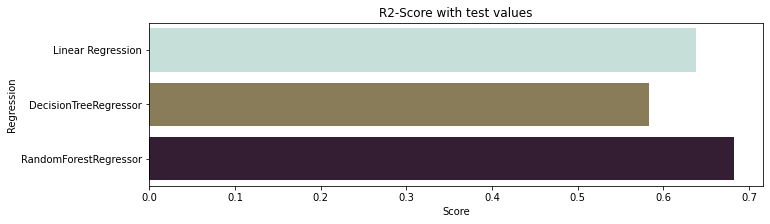

In [109]:
# Visualisation of predictions in CV with 10 fold
plt.subplots(figsize=(11, 3))
sns.barplot(x=score_pred,y=model_pred,palette = sns.cubehelix_palette(len(score_pred),rot=0.9))
plt.xlabel("Score")
plt.ylabel("Regression")
plt.title('R2-Score with test values')
plt.show()

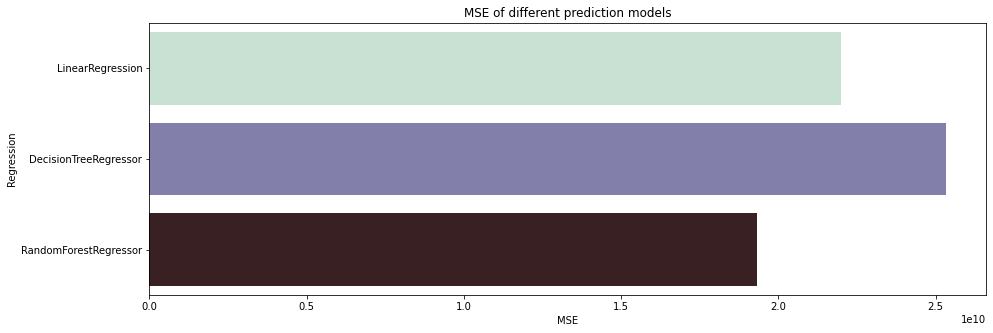

In [110]:
MSE=[]
Regressor=[]

MSE.append(mean_squared_error(y_test,LinReg_pred)),Regressor.append('LinearRegression')
MSE.append(mean_squared_error(y_test,DTR_pred)),Regressor.append('DecisionTreeRegressor')
MSE.append(mean_squared_error(y_test,RFR_pred)),Regressor.append('RandomForestRegressor')

plt.subplots(figsize=(15, 5)) 
sns.barplot(x=MSE,y=Regressor,palette = sns.cubehelix_palette(len(MSE),rot=2))
plt.xlabel("MSE")
plt.ylabel("Regression")
plt.title('MSE of different prediction models')
plt.show()

In [30]:
kcdata.iloc[3]

price            550000.0
bedrooms              4.0
bathrooms             1.0
sqft_living        1660.0
sqft_lot          16400.0
floors                1.0
grade                 5.5
sqft_above          930.0
sqft_basement       730.0
zipcode           98052.0
Name: 36, dtype: float64

In [31]:
singletest = kcdata.iloc[3]
s_real = singletest['price']
s_test1 = singletest.drop(['price'])
s_test2 = s_test1.copy()
s_test3 = s_test1.copy()
s_test2['zipcode'] = 98103.0
s_test3['zipcode'] = 98038.0

In [32]:
# made up test case
s_test3 = s_test1.copy()
s_test3['sqft_living'] = 4000.0
s_test3['sqft_above'] = 3270.0
#s_test3
s_test3 = np.array(s_test3).reshape(1, -1)
RFR.predict(s_test3)

array([763750.14])

In [33]:
s_test1 = np.array(s_test1).reshape(1, -1)
RFR.predict(s_test1)

array([459806.28571429])

In [34]:
s_test2 = np.array(s_test2).reshape(1, -1)
RFR.predict(s_test2)

array([451413.51])

In [35]:
s_test3 = np.array(s_test3).reshape(1, -1)
RFR.predict(s_test3)

array([763750.14])

In [36]:
RFR.score(X_test, y_test)

0.7751230639226705

In [37]:
DTR.score(X_test, y_test)

0.6286913040338022

[Text(0.5, 1.0, 'Homes in 98052'), Text(0.5, 0, 'Price ($MM)')]

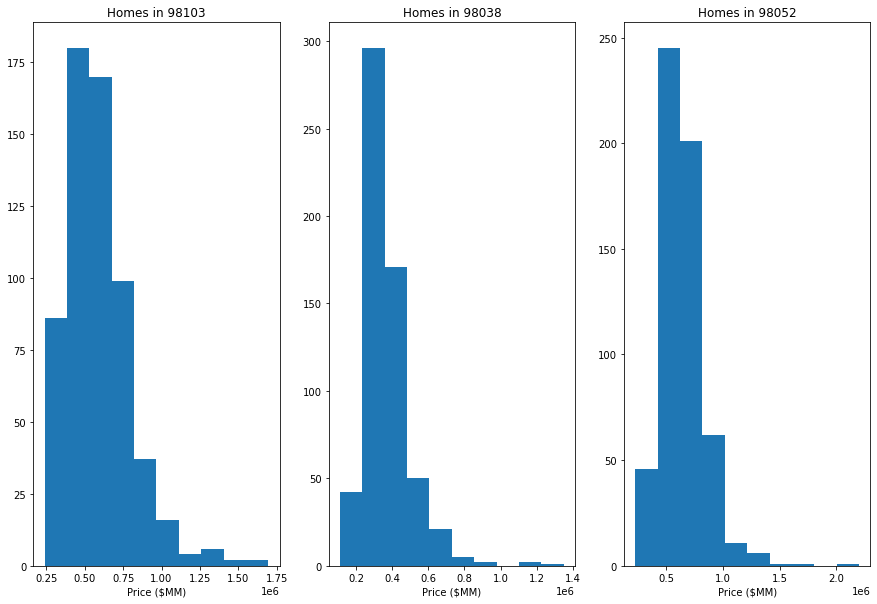

In [111]:
fig, ((ax0),(ax1),(ax2)) = plt.subplots(figsize=(15,10),nrows=1,ncols=3)
ax0.hist(kcdata[kcdata['zipcode'] == 98103.0]['price'])
ax0.set(title='Homes in 98103', xlabel='Price ($MM)')
ax1.hist(kcdata[kcdata['zipcode'] == 98038.0]['price'])
ax1.set(title='Homes in 98038', xlabel='Price ($MM)')
ax2.hist(kcdata[kcdata['zipcode'] == 98052.0]['price'])
ax2.set(title='Homes in 98052', xlabel='Price ($MM)')


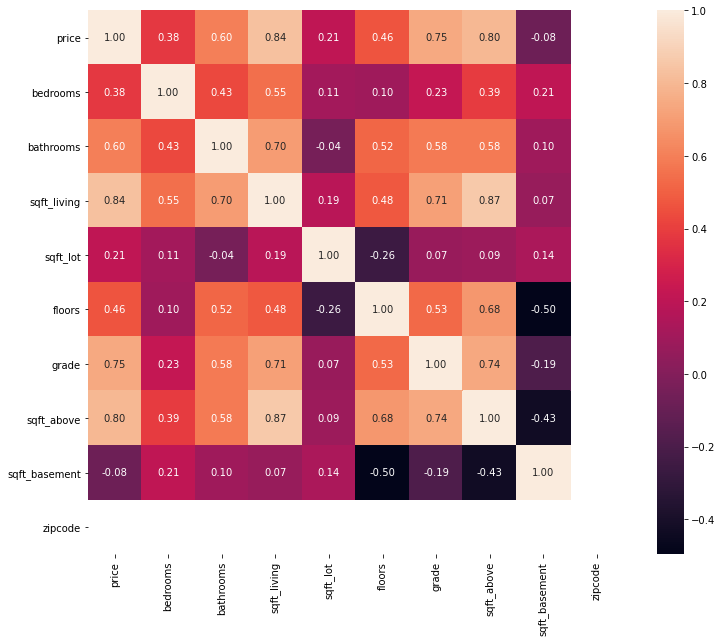

In [39]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(kcdata[kcdata['zipcode'] == 98052.0].corr(), annot=True, fmt='.2f', ax=ax)
plt.show()

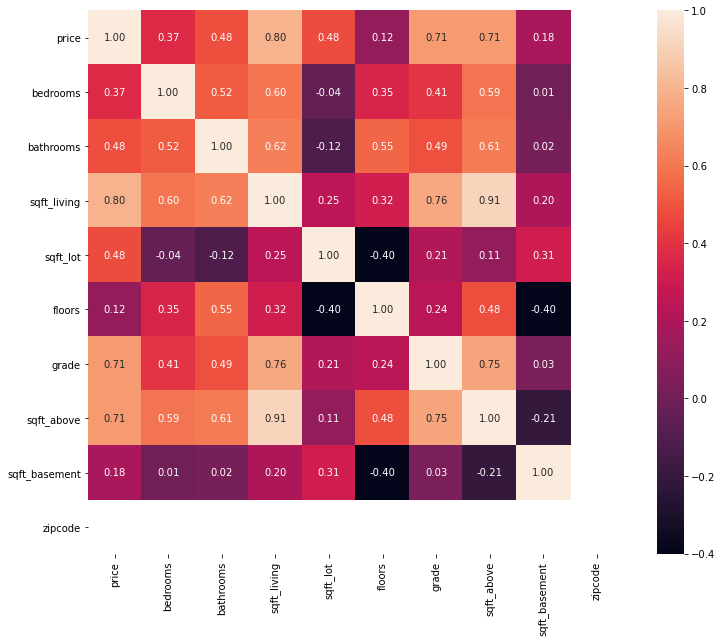

In [40]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(kcdata[kcdata['zipcode'] == 98038.0].corr(), annot=True, fmt='.2f', ax=ax)
plt.show()

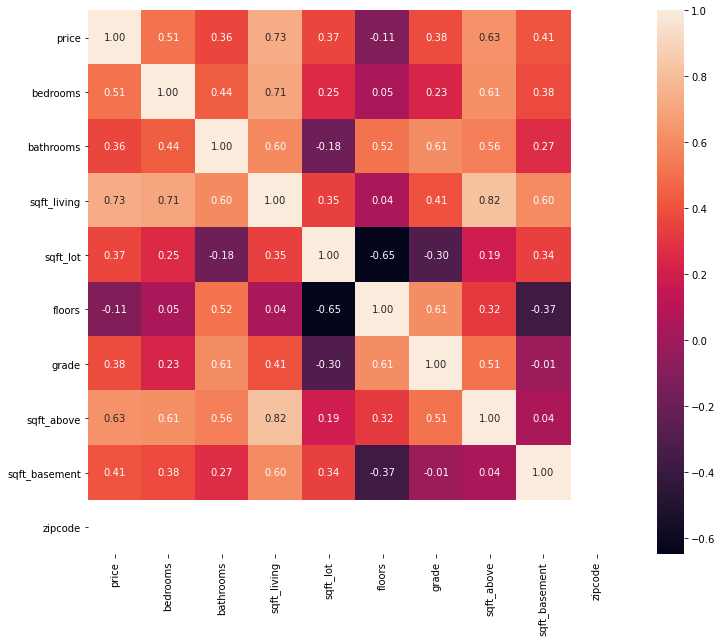

In [41]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(kcdata[kcdata['zipcode'] == 98103.0].corr(), annot=True, fmt='.2f', ax=ax)
plt.show()

In [205]:
def rand_picker(df):
    row = []
    for col in df.columns[1:]:
        row.append(float(np.random.choice(df[col], size=1)))
    return row

test_row = rand_picker(kcdata)
#test_row = np.array(test_row).reshape(1, -1)
#RFR.predict(test_row)
test_row

[5.0, 2.5, 1460.0, 95832.0, 2.5, 8.0, 1340.0, 0.0, 98038.0]

In [115]:
pd.DataFrame(test_row, columns=kcdata.columns[1:])

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,zipcode
0,1.5,2.25,2610.0,3427.0,2.0,8.0,1640.0,0.0,98103.0


In [116]:
kcdata[kcdata['price'] == kcdata['price'].max()]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,zipcode
1361,2200000.0,5.0,4.25,4640,22703,2.0,8,2860,1780,98052


In [117]:
kcdata[kcdata['price'] == kcdata['price'].min()]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,zipcode
17197,110000.0,3.0,1.0,1250,53143,1.0,6,1250,0,98038


In [202]:
kcdata['sqft_lot'].max()

623779

In [30]:
!{sys.executable} -m pip install -U ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [112]:
import os
from IPython.display import Image, display, HTML

In [113]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [114]:
def rand_picker(df):
    row = []
    for col in df.columns[1:]:
        row.append(float(np.random.choice(df[col], size=1)))
    return row

def test_feats(change):
    test_row = np.array([beds.value, baths.value, living.value, lot.value, 
                        floors.value, grade.value, above.value, basement.value,
                       zipcode.value]).reshape(1, -1)
    guess = RFR.predict(test_row)
    output.value = str(guess[0])
    
def random_feats(change):
    test_row = rand_picker(kcdata)
    beds.value = test_row[0]
    baths.value = test_row[1]
    living.value = test_row[2]
    lot.value = test_row[3]
    floors.value = test_row[4]
    grade.value = test_row[5]
    above.value = test_row[6]
    basement.value = test_row[7]
    zipcode.value = int(test_row[8])

    
defaults = rand_picker(kcdata)
beds = widgets.FloatSlider(min=0,max=10,value=defaults[0],step=1, description="Bedrooms",orientation='vertical')
baths = widgets.FloatSlider(min=0,max=10,value=defaults[1],step=0.25, description="Bathrooms",orientation='vertical')
living = widgets.FloatSlider(min=0,max=20000,value=defaults[2],step=50, description="Sqft Living Space",orientation='vertical')
lot = widgets.FloatSlider(min=0,max=200000,value=defaults[3],step=100, description="Sqft Lot size",orientation='vertical')
floors = widgets.FloatSlider(min=0,max=5,value=defaults[4],step=0.5, description="Floors",orientation='vertical')
grade = widgets.FloatSlider(min=0,max=15,value=defaults[5],step=0.5, description="Grade",orientation='vertical')
above = widgets.FloatSlider(min=0,max=10000,value=defaults[6],step=50, description="Sqft Above ground",orientation='vertical')
basement = widgets.FloatSlider(min=0,max=10000,value=defaults[7],step=50, description="Sqft Basement",orientation='vertical')
zipcode = widgets.RadioButtons(
    options=[98103,98038,98052],
    value=98103,
    description='ZIP Code:',
    disabled=False)
output = widgets.Text(
    value=str("%.2f" % RFR.predict(np.array(defaults).reshape(1, -1))[0]),
    description='Estimated Home Price:',
    disabled=True,
    style={'description_width': 'initial'})

rando = widgets.Button(description='Generate Random', disabled=False)
rando.on_click(random_feats)
beds.observe(test_feats)
baths.observe(test_feats)
living.observe(test_feats)
lot.observe(test_feats)
floors.observe(test_feats)
grade.observe(test_feats)
above.observe(test_feats)
basement.observe(test_feats)
zipcode.observe(test_feats)

ins = widgets.HBox([beds, baths, living, lot, floors, grade, above, basement,zipcode])
#ins2 = widgets.VBox([zipcode, rando])
#top = widgets.HBox([ins, ins2])
out = widgets.HBox([output,rando])
widgets.VBox([ins, out])


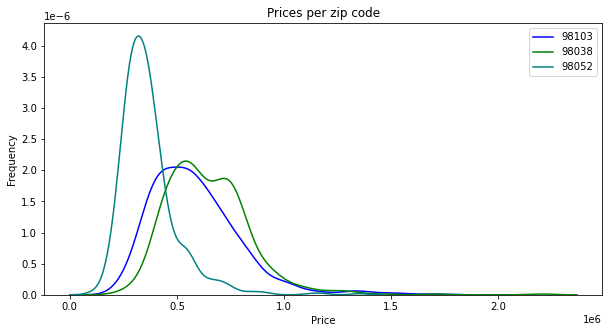

In [115]:
zip1_prices = kcdata[kcdata['zipcode']==98103.0]['price']
zip2_prices = kcdata[kcdata['zipcode']==98052.0]['price']
zip3_prices = kcdata[kcdata['zipcode']==98038.0]['price']

f,ax=plt.subplots(figsize=(10, 5))

ax=sns.kdeplot(zip1_prices,label='98103',color='blue')
sns.kdeplot(zip2_prices,label='98052',color='g',ax=ax)
sns.kdeplot(zip3_prices,label='98038',color='teal',ax=ax)
ax.set(ylabel='Frequency', xlabel='Price')
ax.legend(zips)
plt.title("Prices per zip code");